1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigenvalues = 
 [2.45367530e+01+0.j 1.60495861e-16+0.j 2.09329127e+00+0.j]
 Real Component of the Eigenvalues = 
 [2.45367530e+01 1.60495861e-16 2.09329127e+00]
V: 
 [[-0.11481974 -0.81649658  0.56581778]
 [-0.57816268 -0.40824829 -0.70644267]
 [-0.80780217  0.40824829  0.42519289]] 


SVD:
Eigenvalues:
 [2.45387795e+01 2.09603417e+00 4.75739384e-30]
Eigenvectors:
 [[-0.11487918  0.56580572 -0.81649658]
 [-0.57808847 -0.7065034  -0.40824829]
 [-0.80784683  0.42510803  0.40824829]]

Check that the two procedures yield to same result? True
By selecting the component 0, we retain 92.14% of the total variability
By selecting the component 1, we retain 0.00% of the total variability
By selecting the component 2, we retain 7.86% of the total variability


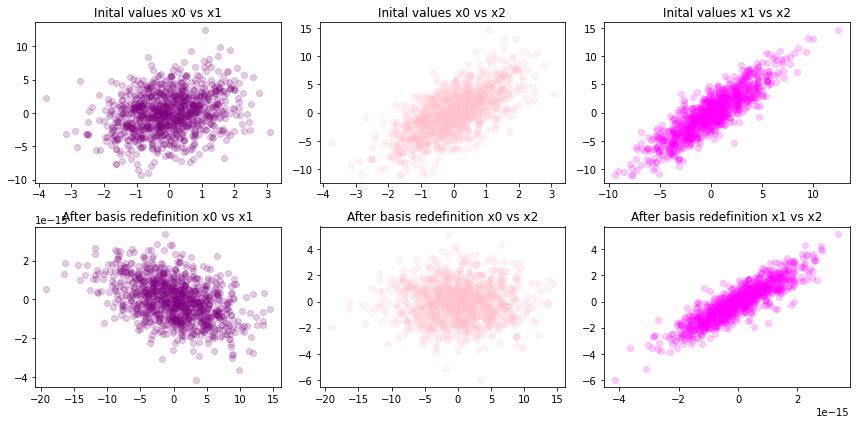

In [14]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy.random as npr

N=1000
mean_1 = 0
std_1 = 1
mean_2 = 0
std_2 = 3

ds_1 = np.random.normal(loc=mean_1, scale=std_1, size=N)
ds_2 = ds_1 + np.random.normal(loc=mean_2, scale=std_2, size=N)
ds_3 = 2*ds_1 + ds_2
dataset = np.vstack((ds_1,ds_2,ds_3))

#To create a dataset that simulates three different features

mcov = np.cov(dataset)
evalsc, evecsc = la.eig(mcov)
index = evalsc.argsort()[::-1]
evalsc = evalsc[index]
evecsc = evecsc[:,index]

#To find the eigenvalues and eigenvectors of a matrix, you can use the eigendecomposition of the covariance matrix. This is a way of breaking down the matrix into its different components, including the eigenvalues and eigenvectors.

l, V = la.eig(C)
print('Eigenvalues = \n', l)

# trying to get only the actual component of the value

l = np.real_if_close(l)
print(' Real Component of the Eigenvalues = \n', l)
print('V: \n', V, '\n')

#Find the eigenvectors and eigenvalues using the SVD
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(N-1) 
V_svd = U
print("\nSVD:")

print("Eigenvalues:\n", l_svd)
print("Eigenvectors:\n", V_svd)

#the two procedures yield to same result

print("\nCheck that the two procedures yield to same result?",
np.allclose(np.sort(l), np.sort(l_svd), atol=1e-2) and np.allclose(np.sort(V), np.sort(V_svd), atol=1e-2))
Lambda = np.diag(l)
print("By selecting the component 0, we retain %.2f%% of the total variability" % ((Lambda[0, 0]/Lambda.trace())*100))
print("By selecting the component 1, we retain %.2f%% of the total variability" % ((Lambda[1, 1]/Lambda.trace())*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((Lambda[2, 2]/Lambda.trace())*100))

#The result totally make sense because only the first variable is totally independent from the others, while the others two are strongly correlated to the first one so are not able to retain a large value of the total variability


#Redefining the data according to the new basis from the PCA
Xp = np.dot(V.T, X)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], alpha=0.2, c='purple')
ax01.set_title('Inital values x0 vs x1')
ax02.scatter(X[0], X[2], alpha=0.2, c='pink')
ax02.set_title('Inital values x0 vs x2')
ax03.scatter(X[1], X[2], alpha=0.2, c='magenta')
ax03.set_title('Inital values x1 vs x2')

ax11.scatter(Xp[0], Xp[1], alpha=0.2, c='purple')
ax11.set_title('After basis redefinition x0 vs x1')
ax12.scatter(Xp[0], Xp[2], alpha=0.2, c='pink')
ax12.set_title('After basis redefinition x0 vs x2')
ax13.scatter(Xp[1], Xp[2], alpha=0.2, c='magenta')
ax13.set_title('After basis redefinition x1 vs x2')

plt.tight_layout()
plt.show()


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [ ]:
#Adding uncorrelated random noise
noise=[]
for i in range(10):
    noise.append(np.random.normal(loc=mean_1, scale=(std_1)/20, size=N))

data_n = np.vstack([dataset, noise[0], noise[1], noise[2], noise[3], noise[4], noise[5], noise[6], noise[7], noise[8], noise[9]])
mcovn = np.cov(data_n)
evalscn, evecscn = np.linalg.eig(mcovn)
UN, SN, VN = np.linalg.svd(data_n) 
evalsvd = SN**2/(N-1)
evecsvd = UN

print("Eigenvalues Covariance with Noise:\n", evalsc)
print("\nEigenvectors Covariance with Noise:\n", evecsc)
print("\nEigenvalues SVD with Noise:\n", evalsvd)
print("\nEigenvectors SVD with Noise:\n", evecsvd)

evecsc_pcan = evecscn[:,:2]
data_pcn = np.dot(evecsc_pcan.T, data_n)
data_pcn = np.vstack([data_pcn, np.zeros((1, N))]) 
print(data_pcn)     

#The two datasets have a lot of similarities- both of them have only two variabales, and it is higher than 99% that they would be the same.



Eigenvalues Covariance with Noise:
 [ 2.77276695e+01+0.j  1.90045356e+00+0.j -1.39494013e-15+0.j]

Eigenvectors Covariance with Noise:
 [[-0.12079055  0.56457327 -0.81649658]
 [-0.57066767 -0.71251087 -0.40824829]
 [-0.81224876  0.41663567  0.40824829]]

Eigenvalues SVD with Noise:
 [2.78193012e+01 1.90229328e+00 2.90555010e-03 2.73427436e-03
 2.70132312e-03 2.62001862e-03 2.49429669e-03 2.42970254e-03
 2.35272729e-03 2.22227549e-03 2.20513981e-03 2.15274695e-03
 1.89357911e-30]

Eigenvectors SVD with Noise:
 [[-1.21071209e-01  5.64508205e-01 -9.07942440e-05  4.94203049e-04
  -6.03133826e-04  1.74574076e-03 -1.65627149e-04  7.55772145e-05
  -6.45798859e-04  5.29781556e-04 -3.77493902e-04 -1.02225452e-03
  -8.16496581e-01]
 [-5.70312959e-01 -7.12788571e-01  3.13501419e-04 -2.52984879e-04
   2.16577678e-04 -2.43315944e-03  3.21273592e-04 -1.84935705e-04
   5.95443604e-04 -5.91865002e-04  4.74793633e-04  1.31031903e-03
  -4.08248290e-01]
 [-8.12455377e-01  4.16227838e-01  1.31912931e-04  

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 